# Как рассчитывать доходность и волатильность

In [23]:
# https://pypi.org/project/yfinance/

In [ ]:
#!pip3 install yfinance

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sber = yf.download('SBER.ME','2016-01-01')

[*********************100%***********************]  1 of 1 completed


### Доходность

Данная величина представляет собой процентное изменение стоимости акции за один торговый день. Оно не учитывает дивиденды и комиссии. Его легко рассчитать используя функцию pct_change().

Как правило используют лог доходность, так как она позволяет лучше понять и исследовать изменения с течением времени.

In [7]:
# Скорректированая цена закрытия`
daily_close = sber[['Adj Close']]

# Дневная доходность
daily_pct_change = daily_close.pct_change()

# Заменить NA значения на 0
daily_pct_change.fillna(0, inplace=True)

daily_pct_change.head()

,Adj Close
Date,
2016-01-04,0.000000
2016-01-05,0.008979
2016-01-06,-0.020629
2016-01-11,-0.060093
2016-01-12,0.007470


In [8]:
# Дневная лог доходность
daily_log_returns = np.log(daily_close.pct_change()+1)

daily_log_returns.head()

,Adj Close
Date,
2016-01-04,NaN
2016-01-05,0.008939
2016-01-06,-0.020845
2016-01-11,-0.061974
2016-01-12,0.007442


Чтобы из полученных данных узнать недельную и/или месячную доходность, используют функцию resample().

In [9]:
# Взять у `sber` значения за последний рабочий день месяца
monthly = sber.resample('BM').apply(lambda x: x[-1])

# Месячная доходность
monthly.pct_change().tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,0.073717,0.092367,0.073304,0.087310,0.194223,0.391410
2020-08-31,0.040378,0.034823,0.034816,0.022645,0.022645,0.043800
2020-09-30,-0.011013,0.004527,-0.007733,0.012666,0.012666,0.214171
2020-10-30,-0.093007,-0.112286,-0.100779,-0.120572,-0.041984,0.063812
2020-11-30,0.176604,0.175405,0.178372,0.182953,0.182953,-0.420770


In [10]:
# Пересчитать `sber` по кварталам и взять среднее значение за квартал
quarter = sber.resample("4M").mean()

# Квартальную доходность
quarter.pct_change().tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-30,0.053592,0.052010,0.053732,0.053130,0.120104,-0.267354
2020-01-31,0.044429,0.043917,0.046244,0.045761,0.050750,-0.178308
2020-05-31,-0.141008,-0.135524,-0.149239,-0.143556,-0.129794,1.426994
2020-09-30,0.056380,0.052326,0.063663,0.059189,0.231932,-0.288569
2021-01-31,-0.010289,-0.010778,-0.010721,-0.008535,0.109838,0.347159


Функция pct_change () удобна для использования, но в свою очередь скрывает то, как получается значение. Схожее вычисление, которое поможет понять механизм, можно выполнить при помощи shift(). 

Дневная цена закрытия делится на прошлую (сдвинутую на один) цену и из полученного значения вычитается единица. 
Но есть один незначительный минус – первое значение в результате получается NA.

Дальше строится диаграмма распределения доходности и рассчитывается основная статистика:

In [11]:
# Дневная доходность
daily_pct_change = daily_close / daily_close.shift(1) - 1

daily_pct_change.head()

,Adj Close
Date,
2016-01-04,NaN
2016-01-05,0.008979
2016-01-06,-0.020629
2016-01-11,-0.060093
2016-01-12,0.007470


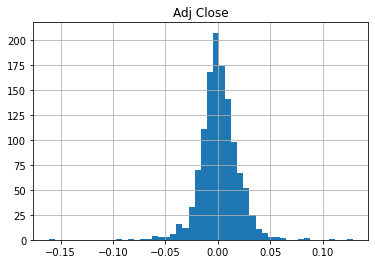

In [12]:
# Диаграмма `daily_pct_c`
daily_pct_change.hist(bins=50)

plt.show()

In [13]:
# Общая статистика
daily_pct_change.describe()

,Adj Close
count,1226.000000
mean,0.001280
std,0.018975
min,-0.161417
25%,-0.008602
50%,0.000384
75%,0.011114
max,0.128986


Распределение выглядит очень симметрично и нормально распределённым вокруг значения 0,00. Для получения других значений статистики используется функция description (). В результате видно, что среднее значение немного больше нуля, а стандартное отклонение составляет практически 0,02.

### Кумулятивная доходность

Кумулятивная дневная прибыль полезна для определения стоимости инвестиций через определенные промежуток времени. Ее можно рассчитать, как приводится в коде ниже.

In [14]:
# Кумулютивная дневная доходность
cum_daily_return = (1 + daily_pct_change).cumprod()

cum_daily_return.tail()

,Adj Close
Date,
2020-11-16,4.003414
2020-11-17,3.968964
2020-11-18,3.957966
2020-11-19,3.866263
2020-11-20,3.847340


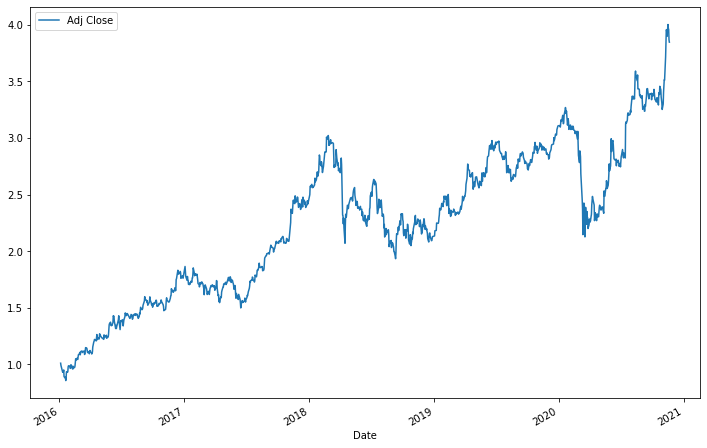

In [15]:
# Построение кумулятивной дневной доходности
cum_daily_return.plot(figsize=(12,8))

plt.show()

Можно пересчитать доходность в месячном периоде:


In [16]:
# Месячная кумулятивная доходность
cum_monthly_return = cum_daily_return.resample("M").mean()

cum_monthly_return.tail()

,Adj Close
Date,
2020-07-31,3.054706
2020-08-31,3.431979
2020-09-30,3.347292
2020-10-31,3.363202
2020-11-30,3.766242


Знание того, как рассчитать доходность, является ценным при анализе акции. Но еще большую ценность оно представляет при сравнении с другими акциями.

Возьмем некоторые акции (выбор их совершенно случайный) и построим их диаграмму.

[*********************100%***********************]  7 of 7 completed


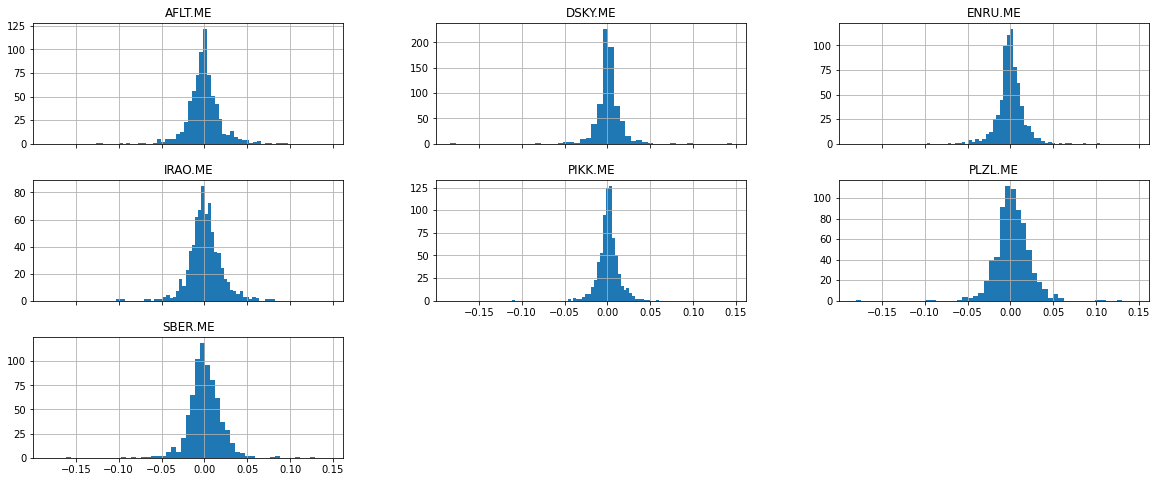

In [17]:
ticker = ['AFLT.ME','DSKY.ME','IRAO.ME','PIKK.ME', 'PLZL.ME','SBER.ME','ENRU.ME']

stock = yf.download(ticker,'2018-01-01')

# Дневная доходность в `daily_close_px`
daily_pct_change = stock['Adj Close'].pct_change()

# Распределение
daily_pct_change.hist(bins=50, sharex=True, figsize=(20,8))

plt.show()

Еще один полезный график — матрица рассеяния. Ее можно легко построить при помощи функции scatter_matrix (). В качестве аргументов используется daily_pct_change и устанавливается параметр Ядерной оценки плотности — Kernel Density Estimation. Кроме того, можно установить прозрачность с помощью параметра alpha и размер графика с помощью параметра figsize.

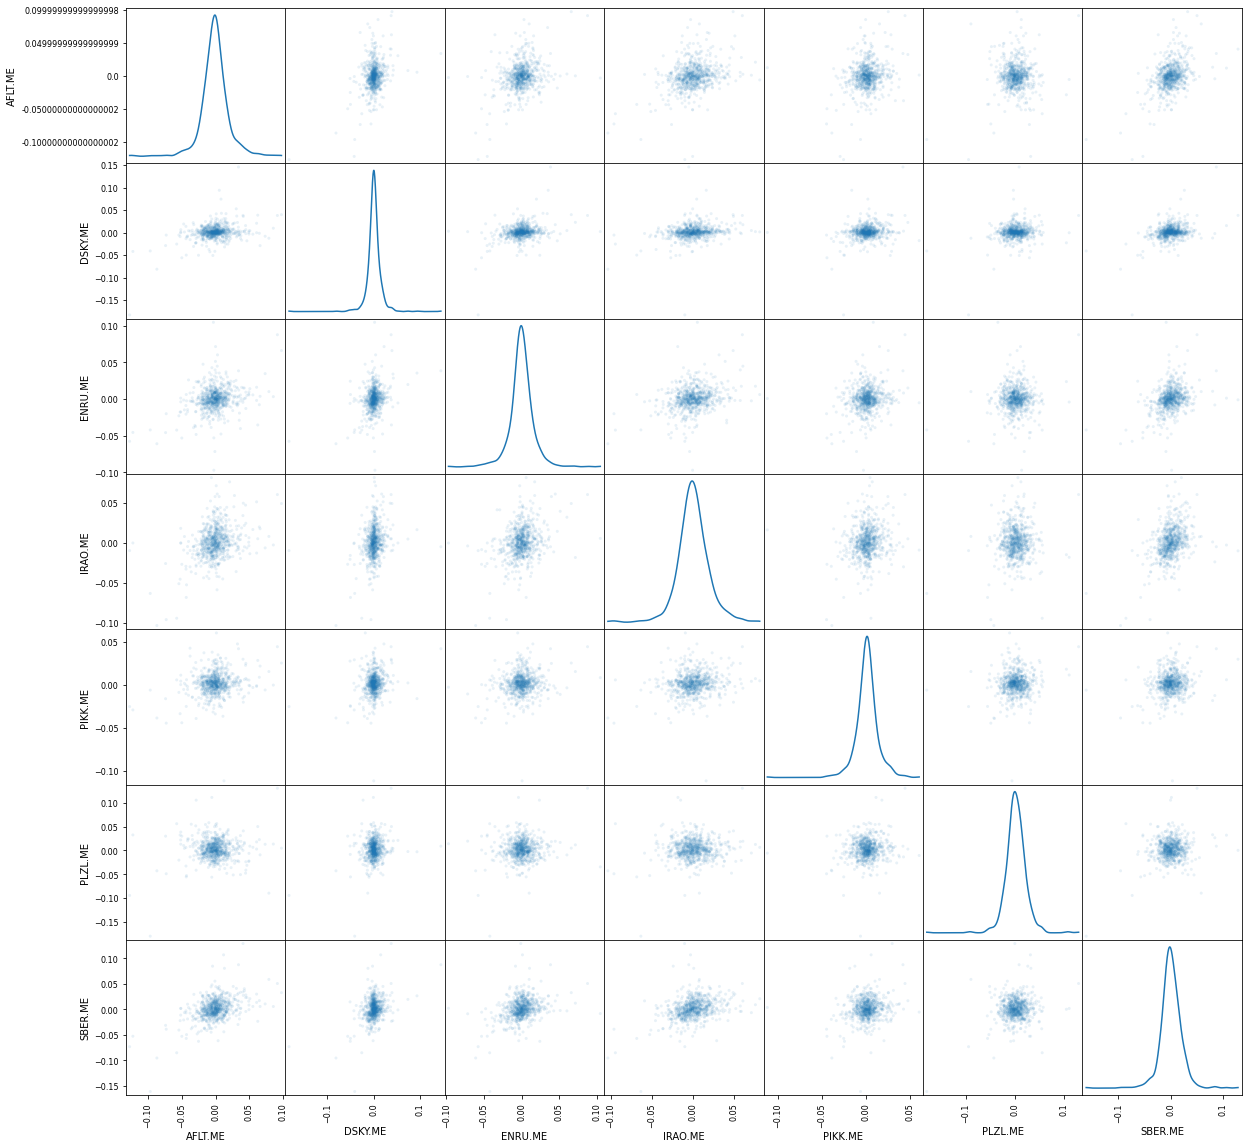

In [18]:
from pandas.plotting import scatter_matrix

# Матрица рассеивания `daily_pct_change`  
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(20,20))

plt.show()

In [ ]:
# https://habr.com/ru/post/492364/

### Скользящее окно (Moving Windows)

Смысл скользящего окна – с каждым новым значением функция пересчитывается за заданный период времени. Этих функций большое количество. Для примера: rolling.mean(), rolling.std(), которые чаще всего и используют при анализе движения акций. rolling.mean() — это обычная скользящая средняя, которая сглаживает краткосрочные колебания и позволяет визуализировать общую тенденцию.

In [19]:
# Выделяю скорректированную цену закрытия 
adj_close_px = sber['Adj Close']

# Вычисляю скользящую среднию
moving_avg = adj_close_px.rolling(window=40).mean()

# Вывожу результат
moving_avg[-10:]

Date
2020-11-09    209.510957
2020-11-10    210.224201
2020-11-11    211.033677
2020-11-12    211.835822
2020-11-13    212.549332
2020-11-16    213.460643
2020-11-17    214.423122
2020-11-18    215.315130
2020-11-19    216.056209
2020-11-20    216.761612
Name: Adj Close, dtype: float64

График, который позволит понять то, что получается в результате работы данной функции:

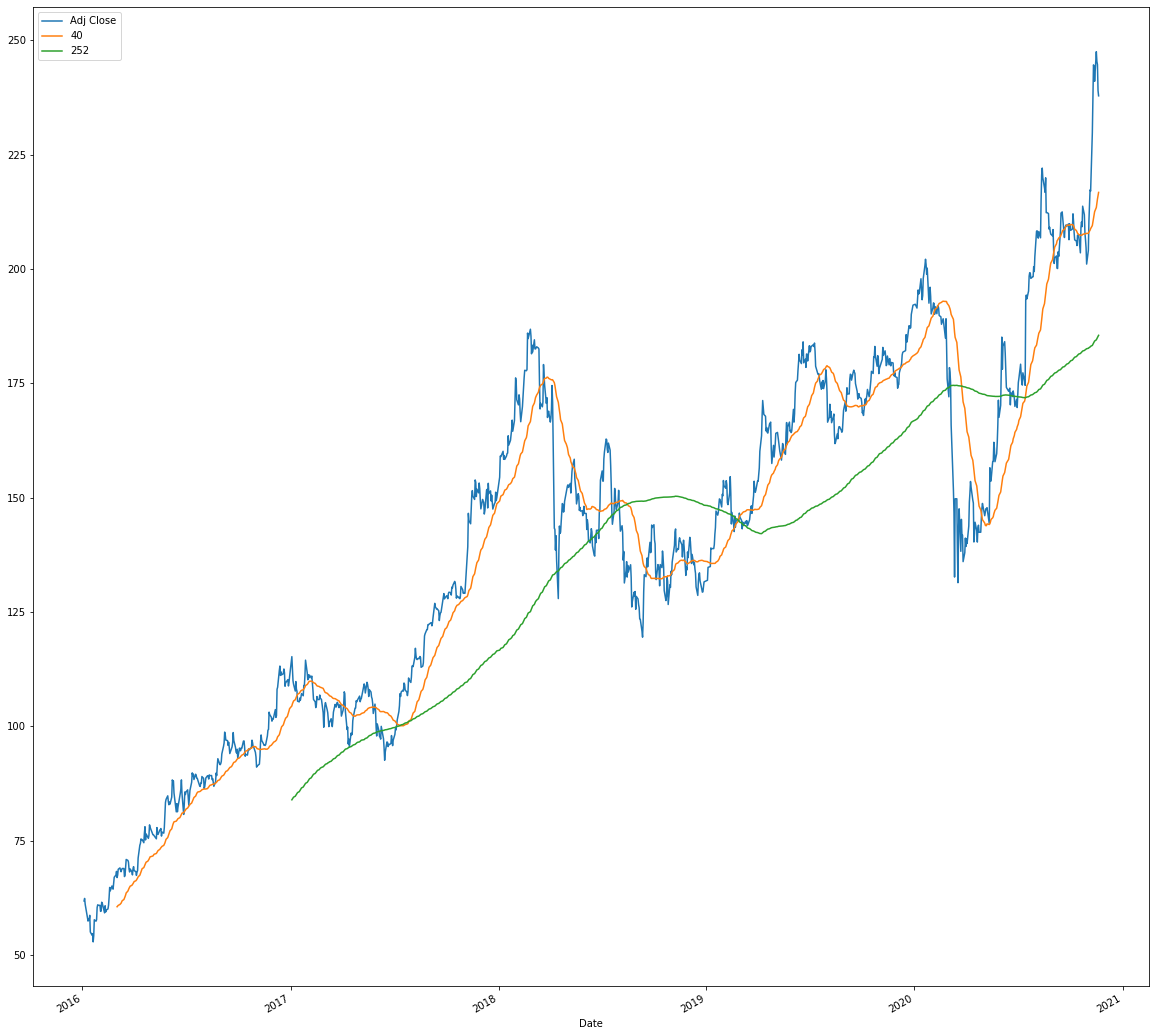

In [20]:
# Вычисление короткой скользящей средней
sber['40'] = adj_close_px.rolling(window=40).mean()

# Вычисление длинной скользящей средней
sber['252'] = adj_close_px.rolling(window=252).mean()

# Построение полученных значений
sber[['Adj Close', '40', '252']].plot(figsize=(20,20))

plt.show()

Как видно rolling.mean() справляется с поставленной задачей. Функция сглаживает краткосрочные колебания и позволяет увидеть долгосрочный тренд на основании которого можно принять решение: цена выше рассматриваемой скользящей средней — берем акцию, ниже — продаем акцию — если просто и я бы не советовал следовать этому методу. Как правило помимо скользящих средних используются и другие индикаторы, которые могут подтвердить правильность принимаемого решения. Каждый должен самостоятельно принять решение в зависимости от стиля торговли.

### Волатильность

Волатильность акций — это изменение дисперсии доходности акций в течение определенного периода времени. Обычно сравнивают волатильность одной акции с другой, чтобы получить представление о том, какая может иметь больший риск, или с рыночным индексом, чтобы понять волатильность акций относительно рынка. Как правило, чем выше волатильность, тем рискованнее инвестиции в эту акцию. Необходимо отметить, что она не является постоянной и изменяется с течением времени. Это можно увидеть опять же при помощи функции rolling.std(). Пример расчета изменения волатильности:

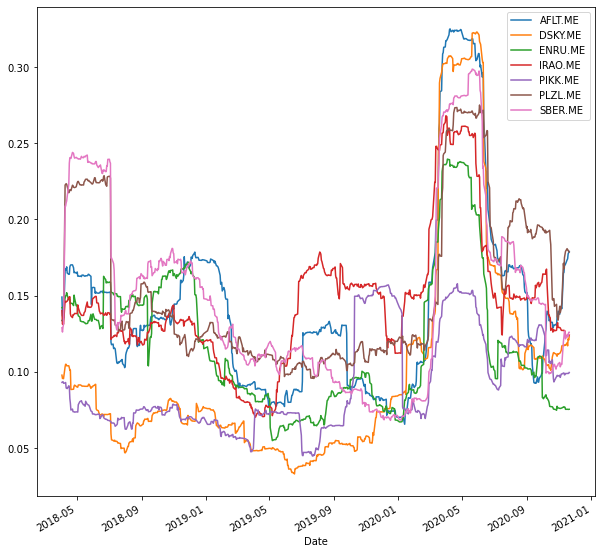

In [21]:
# Определяю рассматриваемый период
min_periods = 60 

# Вычисляю волатильность
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Строю график
vol.plot(figsize=(10, 10))

plt.show()

Прошу обратить внимание, что появилось еще два значения — индекс московской биржи (IMOEX.ME) и РБК (RBCM.ME).

In [22]:
# https://habr.com/ru/post/494636/

In [ ]:
# https://habr.com/ru/post/496810/